##Bull Spread 전략
Bull Spread 전략은 옵션을 이용하여 가격 상승에 따른 제한적인 이익을 추구하면서 하락 위험을 제한하는 전략입니다. 예를 들어, 같은 만기일에 행사가격이 다른 두 개의 콜 옵션을 매수하고 매도하여 Bull Call Spread를 구성할 수 있습니다.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-448b4987f10b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-1-448b4987f10b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Call Buy Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_buy,
<ipython-input-1-448b4987f10b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

            Stock Price  Stock Return  Bull Spread Profit  Bull Spread Return
Date                                                                         
2023-01-03   125.070000      0.000000                -3.0            0.000000
2023-01-04   126.360001      0.010314                -3.0           -0.023987
2023-01-05   125.019997     -0.010605                -3.0           -0.023742
2023-01-06   129.619995      0.036794                -3.0           -0.023996
2023-01-09   130.149994      0.004089                -3.0           -0.023145
...                 ...           ...                 ...                 ...
2023-12-22   193.600006     -0.005547                 7.0            0.035956
2023-12-26   193.050003     -0.002841                 7.0            0.036157
2023-12-27   193.149994      0.000518                 7.0            0.036260
2023-12-28   193.580002      0.002226                 7.0            0.036241
2023-12-29   192.529999     -0.005424                 7.0       

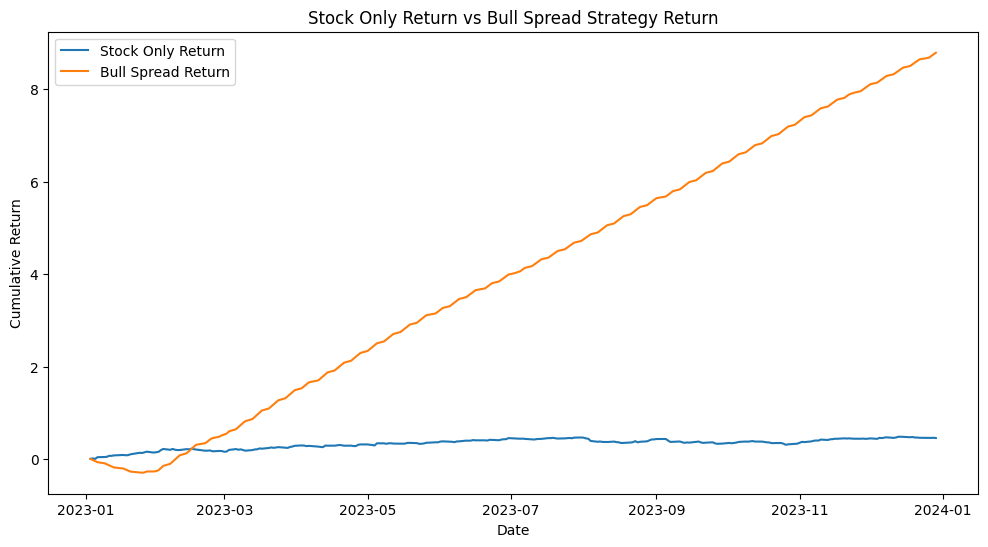

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# Bull Spread 설정
strike_price_buy = 140
strike_price_sell = 150
premium_paid = 5   # 낮은 행사가격의 콜 옵션 매수 시 지불한 프리미엄 (예시)
premium_received = 2  # 높은 행사가격의 콜 옵션 매도 시 받은 프리미엄 (예시)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Bull Spread 수익 계산 함수
def calculate_bull_spread(stock_data, strike_price_buy, strike_price_sell, premium_paid, premium_received):
    # 콜 옵션 손익 계산
    stock_data['Call Buy Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_buy,
                                                  stock_data['Stock Price'] - strike_price_buy,
                                                  0) - premium_paid
    stock_data['Call Sell Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_sell,
                                                   strike_price_sell - stock_data['Stock Price'],
                                                   0) + premium_received
    # Bull Spread 전략의 총 수익 계산
    stock_data['Bull Spread Profit'] = stock_data['Call Buy Profit/Loss'] + stock_data['Call Sell Profit/Loss']

    # 총 수익률 계산
    stock_data['Bull Spread Return'] = stock_data['Bull Spread Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Bull Spread Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
bull_spread_results = calculate_bull_spread(data, strike_price_buy, strike_price_sell, premium_paid, premium_received)

# 결과 출력
print(bull_spread_results[['Stock Price', 'Stock Return', 'Bull Spread Profit', 'Bull Spread Return']])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(bull_spread_results.index, bull_spread_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(bull_spread_results.index, bull_spread_results['Bull Spread Return'].cumsum(), label='Bull Spread Return')
plt.title('Stock Only Return vs Bull Spread Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
